# Lecture 15 - The Perceptron Learning Algorithm

In an Artificial Neural Network (ANN or NN), we attempt to model the human neural network and neurons using programming constructs.

A basic model for a neuron consists of the following: 

* A set of *synapses* each of which is characterized by a *weight* (which includes a *bias*).

* An *adder*.

* An *activation function* (e.g. heaviside function, piece-wise linear function, sigmoid function, ReLu, Leaky ReLu etc.)

# Types of Activation Functions

In artificial neural networks (ANN), the *activation function* of a neuron defines the output of that neuron given an input or set of inputs.

There are many activation functions, the most common are:

1. **Heaviside step function:**
$$\phi(x) = \begin{cases}1, & x >0 \\ 0, & x\leq 0\end{cases}$$

2. **Sigmoid function:**
$$\phi(x) = \frac{1}{1+e^{-x}}$$

3. **Hyperbolic tangent function (tanh):**
$$\phi(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

4. **Rectified Linear (ReLu) function:**
$$\phi(x) = \begin{cases} x, & x\geq 0 \\ 0, & x < 0\end{cases}$$

5. **Leaky ReLu function:**
$$\phi(x) = \begin{cases} x, & x\geq 0 \\ 0.01x, & x < 0\end{cases}$$

There are many many other functions ([Wikipedia link](https://en.wikipedia.org/wiki/Activation_function)).

# Rosenblatt's Perceptron

The Reosenblatt's Perceptron models a *single neuron cell* with a heaviside activation function $\phi(x) = \begin{cases} 1, & x>0 \\ 0, & x\leq 0\end{cases}$

<div><img src="figures/modelneuron.png", width="500"><!div>

We can write this mathematically as: 

$$y_k = \varphi\left( \sum_{j=1}^m w_{kj}x_j + b_k\right)$$

* *What does this look like graphically?*

# Perceptron Learning Algorithm

Suppose we have a "neural network" made of only one neuron - i.e., **Rosenblatt's perceptron** and we would like to train it to distinguish between two classes; where the activation function is:

$$y_i = \varphi(x_i) = \begin{cases} 1 & \text{if }w_{ki}\mathbf{x}_i+b_k>0\\ 0 & \text{otherwise}\end{cases}$$

For Rosenblatt's perceptron to be effective, the classes must be linearly separable. Mathematically, the classes must satisfy:

$$\exists \mathbf{w} \mid \mathbf{w}^T\mathbf{x} +b > 0, \quad \forall \mathbf{x} \in C_1;  \quad \mathbf{w}^T\mathbf{x} +b\leq 0, \quad \forall \mathbf{x} \in C_2$$

* **The Perceptron Learning Algorithm will converge to the correct solution if the classes are linearly separable.**

Consider an alternative error function known as the *perceptron criterion*. To derive this, we note that we are seeking a weight vector $\mathbf{w}$ such that patterns $x_i$ in class $C_1$ will have $\mathbf{w}^Tx_i + b > 0$, whereas the patterns $x_i$ in class $C_2$ have $\mathbf{w}^Tx_i + b < 0$. Using the $t\in \{-1,1\}$ target coding scheme it follows that we would like all patterns to satisfy

$$(\mathbf{w}^Tx_i + b)t_i > 0$$

* The perceptron criterion associates zero error with any pattern that is correctly classified, whereas for a misclassified pattern $x_i$ it tries to minimize the quantity $-(\mathbf{w}^Tx_i + b)t_i$.

* The perceptron criterion is therefore given by:

$$E_p(\mathbf{w},b) = - \sum_{n\in\mathcal{M}} (\mathbf{w}^T \mathbf{x}_n + b) t_n$$

where $\mathcal{M}$ denotes the set of all misclassified patterns.

* We now apply the *stochastic gradient descent* algorithm to this error function. The change in the weight vector $\mathbf{w}$ is then given by:

\begin{eqnarray}
\mathbf{w}^{(t+1)} &\leftarrow & \mathbf{w}^{(t)} - \eta \frac{\partial E_p(\mathbf{w},b)}{\partial \mathbf{w}} = \mathbf{w}^{(t)} + \eta \mathbf{x}_n t_n\\
b^{(t+1)} &\leftarrow & b^{(t)} - \eta\frac{\partial E_p(\mathbf{w},b)}{\partial b} = b^{(t)} + \eta t_n
\end{eqnarray}

where $\eta$ is the **learning rate** parameter and $t$ is an integer that indexes the iteration steps of the algorithm. 

* Note that, as the weight vector evolves during training, the set of patterns that are misclassified will change.

<div><img src="figures/PerceptronLearning.png", width="600"><!div>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def generateMVNRandData(Npts, mu, sigma):
    data  = np.random.multivariate_normal(mu, sigma*np.eye(len(mu)), Npts)
    return data

def plotLine(weights, range):
    x = np.array(range)
    y = -(weights[0]/weights[1])-(weights[2]/weights[1])*x
    plt.plot(y,x)

def perceptronLearningAlg(data,labels,eta,nIterations):
    nPts = data.shape[0]
    weights = np.random.rand(data.shape[1])
    print('Initial weights:', weights)
    
    error = 1
    iter = 0
    
    while (error >0 and iter<nIterations):
        print('Iteration: ', iter, ': Error: ',error)
        error = 0
        iter+=1
        for i in range(nPts):
            activation = data[i,:]@weights
            if np.sign(activation) != labels[i]:
                error +=1
                weights += eta*data[i,:]*labels[i]
                plt.scatter(data[:,1],data[:,2], c=labels, linewidth=0)
                plotLine(weights, [-2,2]);
                plt.pause(2)
                
    print('Final Iteration: ', iter,'; Final Error: ', error)
    return weights

In [11]:
Npts  = 100
mu1   = [2,2]
mu2   = [1,1]
var   = .1
eta   = 0.1
nIterations = 10;

data1 = np.array(generateMVNRandData(Npts, mu1, .1))
data1 = np.hstack((np.ones((Npts,1)),data1))
data2 = np.array(generateMVNRandData(Npts, mu2, .1))
data2 = np.hstack((np.ones((Npts,1)),data2))
data  = np.vstack(( data1, data2))
labels= np.hstack((np.ones(Npts), -np.ones(Npts)))



Initial weights: [0.79072059 0.35791038 0.90617317]
Iteration:  0 : Error:  1


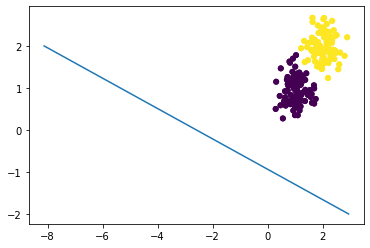

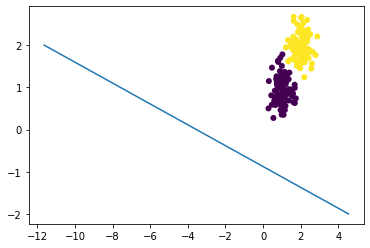

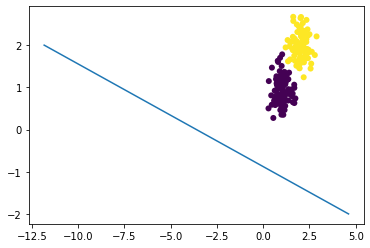

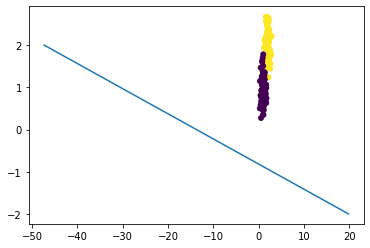

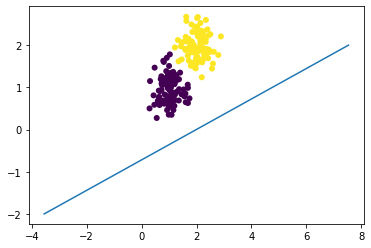

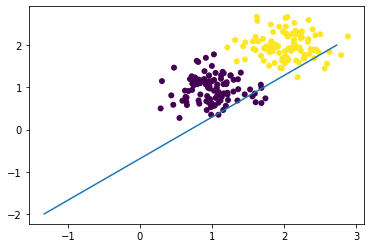

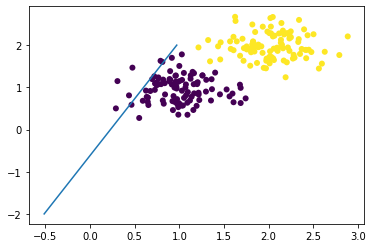

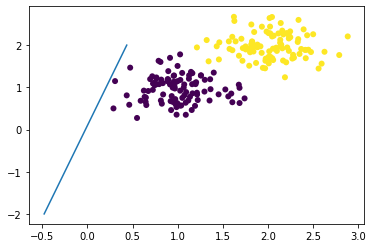

Iteration:  1 : Error:  8


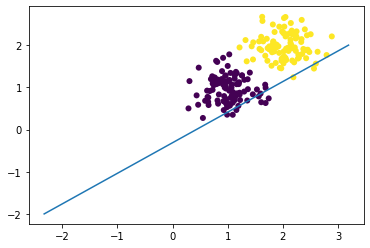

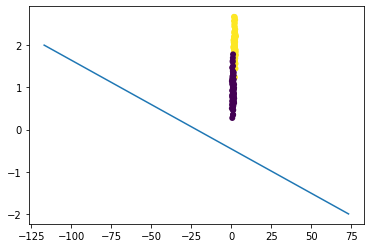

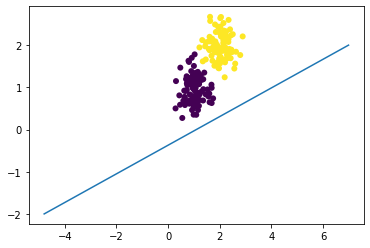

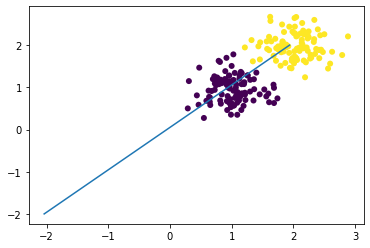

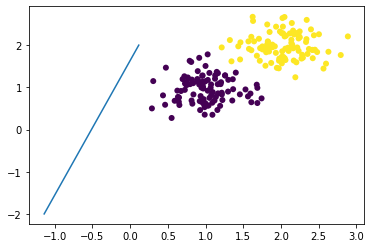

Iteration:  2 : Error:  5


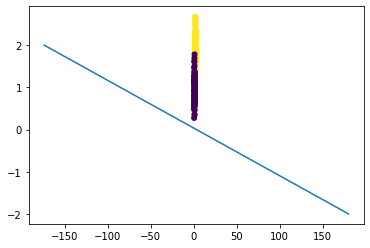

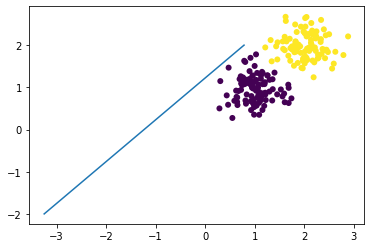

Iteration:  3 : Error:  2


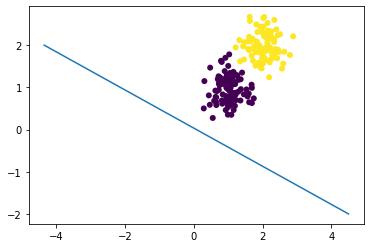

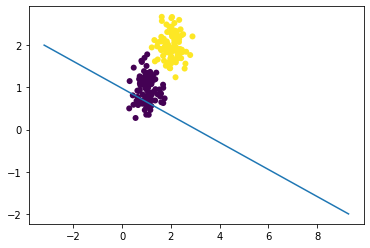

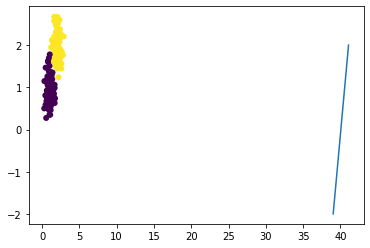

Iteration:  4 : Error:  3


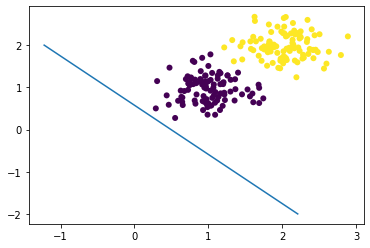

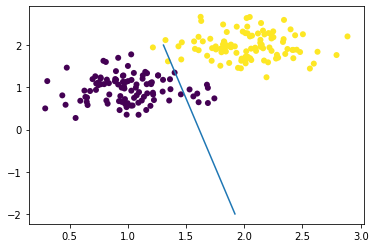

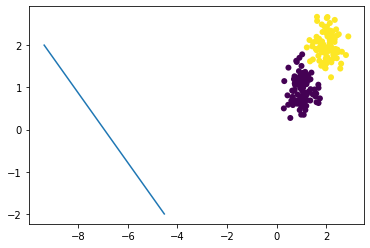

Iteration:  5 : Error:  3


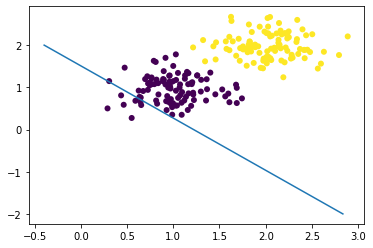

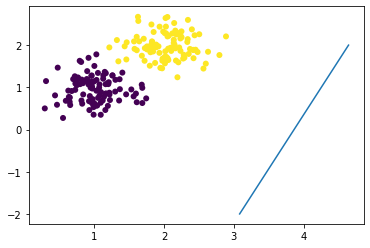

Iteration:  6 : Error:  2


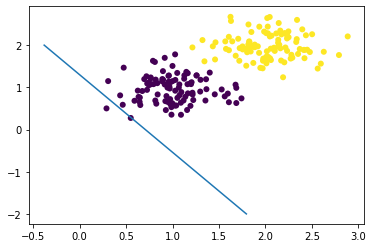

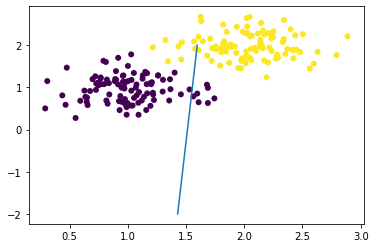

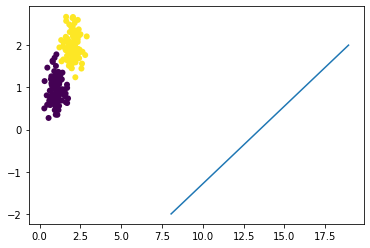

Iteration:  7 : Error:  3


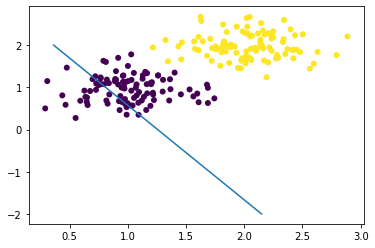

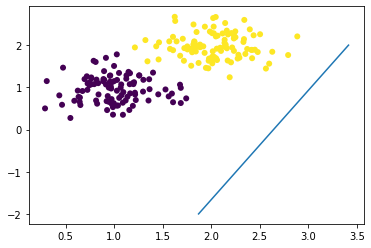

KeyboardInterrupt: 

In [12]:
Npts  = 100
mu1   = [2,2]
mu2   = [1,1]
var   = .5
eta   = 0.1
nIterations = 10;

plt.scatter(data[:,1],data[:,2], c=labels, linewidth=0)

perceptronLearningAlg(data,labels,eta,nIterations)

# Food for Thought

Questions to consider:

1. Consider a neuron with two inputs and one output and a step function. If two weights are $w_1=1$ and $w_2 =1$, and the bias is $b=-1.5$, then what is the output for inputs $(0,0)$, $(1,0)$, $(0,1)$, and $(1,1)$?

2. How does the learning behavior change with changes in $\eta$? as $\eta$ increases? as $\eta$ decreases?

3. How would you generate overlapping classes using the provided code? Explain your answer. (Only change parameters. You do not need to change code.)

4. What happens to the learning behavior when you have overlapping classes?

5. The implementation provided uses $\{-1,1\}$ labels. Suppose we want to use labels $\{0,1\}$. How can we formulate the Perceptron Learning? How does the code need to change to account for this difference (i.e., suppose you want to use $\{0,1\}$ labels. What would you need to change in the code?) Why?

6. In the provided code, there is not a separate line for learning the bias $b$ as in the pseudo-code above. How is it being estimated and represented it in the code? (... the code *is* still learning the bias value).

# Practice Exercises

## 1. Intro to Multilayer Perceptron

Suppose you had the following neural network:

<div><img src="figures/MLP.png", width="300"><!div>

with a heaviside activation function:

$$\phi(x) = \begin{cases} 1 & x > 0 \\ -1 & x \leq 0 \end{cases}$$

1. What is the expression of the output value $y$ in terms of the input values?

2. What is the output with the following input values?
    * $[0,0]$
    * $[-2, -2.5]$
    * $[-5, 5]$
    * $[10, 3]$

3. What does the decision surface of this network look like graphically? Draw it out by hand.

## 2. Decision Trees

The following table contains training examples that help predict whether a patient is likely to have a heart attack ($y = 1$ for "Heart Attack", $y=0$ for "NO Heart Attack").

| $x_1$: chest pain?   | $x_2$:  male?        | $x_3$:  smokes?      | $x_4$:  exercises?   | $y$: heart attack?   |
|----------------------|----------------------|----------------------|----------------------|----------------------|
|          1           |          1           |          0           |          1           |          1           |
|          1           |          1           |          1           |          0           |          1           |
|          0           |          0           |          1           |          0           |          1           |
|          0           |          1           |          0           |          1           |          0           |
|          1           |          0           |          1           |          1           |          1           |
|          0           |          1           |          1           |          1           |          0           |

In the case of any ties, we will prefer to predict class $y = 1$. For the next steps consider $0 \log_2 0 = 0$.

1. Compute the information gain (entropy function) for each feature $x_i$. Which feature should be the root node?

2. Draw the complete decision tree that will be learned from this data. Justify every split based on information gain at every node.